## Breast Cancer Machine Learning Techniques
Machine Learning with Breast Cancer data set. 

+ Raul Eulogio

## Abstract
For this quick project, I wanted to implement a few **Machine Learning** techniques on a data set containing descriptive attributes of digitized images of a process known as, fine needle aspirate (**FNA**) of breast mass. We have a total of 29 features that were computed for each cell nucleus with an ID Number and the Diagnosis (Later converted to binary representations: **Malignant** = 1, **Benign** = 0). 

I used the same models as the other notebook, but this is the expanded data set, and goes more in-depth with the explanations for this project!

**UPDATES**

<!--
(2/3/2017):
+ Exploratory analysis
+ Better ROC Curve Visuals 
+ More Comments

(2/17/2017):
+ Comments on models (Kth Nearest Neighbor)
+ More succint data analysis processes

(2/18/2017):
+ Comments on models (Decision Trees, Random Forest)
+ Variable Importance Visual for Random Forest
+ Better ROC Curve Visuals (Added dotted axis as well as auc Calculations) 

(3/17/2017):
+ Changed Neural Network settings to match .py script
+ Changed ROC Curves accordingly
-->
<img src="https://www.researchgate.net/profile/Syed_Ali39/publication/41810238/figure/fig5/AS:281736006127621@1444182506838/Figure-2-Fine-needle-aspiration-of-a-malignant-solitary-fibrous-tumor-is-shown-A-A.png">


Ex. Image of a malignant solitary fibrous tumor using **FNA**

This is popular data set used for machine learning purposes, and I plan on using the same techniques I used for another data set that performed poorly due to having too many *Categorical* variables (**NOTE**: Learned about *dummy variables* so might revisit and execute analysis correctly this time!)

Here are the **Machine learning methods** I decided to use:

+ Random Forest
+ Neural Networks

I employ critical data analysis modules in this project, emphasizing on: 

+ pandas
+ scikit learn 
+ matplotlib (for visuals)
+ seaborn (easier to make statistical plots)

## 1. Load Modules
We load our modules into our python environment. In my case I am employing a **Jupyter Notebook** while running inside an **|conda** environment. 

For now to illustrate and show the module versions in a simple way I will name the ones I used and show the version I used as follows:

+ numpy==1.11.2
+ pandas==0.18.1
+ matplotlib==1.5.3
+ sklearn==0.18.1
+ seaborn=0.7.1

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd # Data frames
import matplotlib.pyplot as plt # Visuals
import seaborn as sns # Danker visuals
from helperFunctions import *
from sklearn.model_selection import train_test_split # Create training and test sets
from sklearn.model_selection import KFold, cross_val_score # Cross validation
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from sklearn.tree import export_graphviz # Extract Decision Tree visual
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neural_network import MLPClassifier # Neural Networks
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating Area Under Curve for ROC's!
from urllib.request import urlopen # Get data from UCI Machine Learning Repository

pd.set_option('display.max_columns', 500) # Included to show all the columns 
# since it is a fairly large data set
plt.style.use('ggplot') # Using ggplot2 style visuals because that's how I learned my visuals 
# and I'm sticking to it!

## Loading Data
For this section, I'll load the data into a **Pandas** dataframe using `urlopen` from the `urllib.request` module. 

Instead of downloading a csv, I started implementing this method(Inspired by Jason's Python Tutorials) where I grab the data straight from the **UCI Machine Learning Database**. Makes it easier to go about analysis from online sources and cuts out the need to download/upload a csv file when uploading on **GitHub**. I create a list with the appropriate names and set them within the dataframe. **NOTE**: The names were not documented to well so I used [this analysis](https://www.kaggle.com/buddhiniw/d/uciml/breast-cancer-wisconsin-data/breast-cancer-prediction) to grab the variable names and some other tricks that I didn't know that were available in **Python** (I will mention the use in the script!)

Finally I set the column `id_number` as the index for the dataframe. 

In [2]:
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst'] 

breastCancer = pd.read_csv(urlopen(UCI_data_URL), names=names)

breastCancer.set_index(['id_number'], inplace = True) # Setting 'id_number' as our index
namesInd = names[2:] # FOR CART MODELS LATER

### Outputting our data
Its good to always output sections of your data so you can give context to the reader as to what each column looks like, as well as seeing examples of how the data is suppose to be formatted when loaded correctly. Many people run into the issue (especially if you run into a data set with poor documentation w.r.t. the column names), so its good habit to show your data during your analysis. 

We use the function `head()` which is essentially the same as the `head` function in **R** if you come from an **R** background. Notice the syntax for **Python** is significantly different than that of **R** though. 

In [3]:
breastCancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### More Preliminary Analysis
Much of these sections are given to give someone context to the dataset you are utilizing. Often looking at raw data will not give people the desired context, so it is important for us as data enthusiast to fill in the gaps for people who are interested in the analysis. But don't plan on running it anytime soon. 

#### Data Frame Dimensions
Here we use the `.shape` function to give us the lengths of our data frame, where the first output is the row-length and the second output is the column-length. 

#### Data Types
Another important piece of information that is **important** is the data types of your variables in the data set. 

It is often good practice to check the variable types with either the source or with your own knowledge of the data set. For this data set, we know that all variables are measurements, so they are all continous (Except **Dx**), so no further processing is needed for this step.

An common error that can happen is: if a variable is *discrete* (or *categorical*), but has a numerical representation someone can easily forget the pre-processing and do analysis on the data type as is. Since they are numeric they will be interpretted as either `int` or `float` which is incorrect. I can go on and on, but for this data set the numerical representation of the **Dx** is correct and is referred to as *indicator* or *dummy* variables. 



In [4]:
print("Here's the dimensions of our data frame:\n", 
     breastCancer.shape)
print("Here's the data types of our columns:\n",
     breastCancer.dtypes)

Here's the dimensions of our data frame:
 (569, 31)
Here's the data types of our columns:
 diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64

As you can see we'll be dealing mostly with `float` types! For our analysis our next step is converting the Diagnoses into the appropriate binary representation.

## Converting Diagnoses
Important when doing analysis, is converting variable types to the appropriate representation. A tool is as useful as the person utilizing it, so if we enter our data incorrectly the algorithm will suffer not as a result from its capabilities, but from the human component (More on this later). 

Here I converted the Dx to **binary** represenations using the `map` functionality in `pandas`. We are using a dictionary:

    {'M':1, 'B':0}

which then converts the previous string representations of the Dx to the **binary** representation, where 1 == **Malignant** and 0 == **Benign**. 

In [5]:
# Converted to binary to help later on with models and plots
breastCancer['diagnosis'] = breastCancer['diagnosis'].map({'M':1, 'B':0})

# Let's look at the count of the new representations of our Dx's
breastCancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Class Imbalance
The count for our Dx is important because it brings up the discussion of *Class Imbalance* within *Machine learning* and *data mining* applications. 

*Class Imbalance* refers to when a class within a data set is outnumbered by the other class (or classes). 
Reading documentation online, *Class Imbalance* is present when a class populates 10-20% of the data set. 

However for this data set, its pretty obvious that we don't suffer from this, but since I'm practicing my **Python**, I decided to experiment with `functions` to get better at **Python**! 

In [6]:
def classImbalance(item):
    '''
    Goal of this function:
    Loops through the Dx to print percentage of class distributions 
    w.r.t. the length of the data set
    '''
    i = 0
    n = 0
    perMal = 0 
    perBeg = 0
    for item in breastCancer[item]:
        if (item == 1):
            i += 1
        elif (item == 0):
            n += 1
    perMal = (i/len(breastCancer)) * 100
    perBeg = (n/len(breastCancer)) * 100
    print("The percentage of Malignant Dx is: {0:.2f}%".format(perMal)) 
    print("The percentage of Begnin Dx is: {0:.2f}%".format(perBeg))

Let's check if this worked. I'm sure there's more effective ways of doing this process, but this is me doing brute-force attempts to defining/creating working functions. Don't worry I'll get better with practice :)

**OUTPUT**:

In [7]:
classImbalance('diagnosis')

The percentage of Malignant Dx is: 37.26%
The percentage of Begnin Dx is: 62.74%


As we can see here our data set is not suffering from *class imbalance* so we can proceed with our analysis. 

# Exploratory Analysis

An important process in **Machine Learning** is doing **Exploratory Analysis** to get a *feel* for your data. As well as creating visuals that can be digestable for anyone of any skill level. 

So I started by using the `.describe()` function to give some basic statistics relating to each variable. We can see there are 569 instances of each variable (which should make sense), but important to note that the distributions of the different variables have very high variance by looking at the **means** (Some can go as low as .0n while some as large as 800!)


In [8]:
breastCancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We will discuss the high variance in the distribution of the variables later within context of the appropriate analysis. For now we move on to visual representations of our data. Still a continuation of our **Exploratory Analysis**.

# Visual Exploratory Analysis
For this section we utilize the module `Seaborn` which contains many powerful statistical graphs that would have been hard to produce using `matplotlib` (My note: `matplotlib` is not the most user friendly like `ggplot2` in **R**, but **Python** seems like its well on its way to creating visually pleasing and inuitive plots!)

## Scatterplot Matrix
For this visual I cheated by referencing some variables that were indicators of being influencial to the analysis (See **Random Forest** Section).

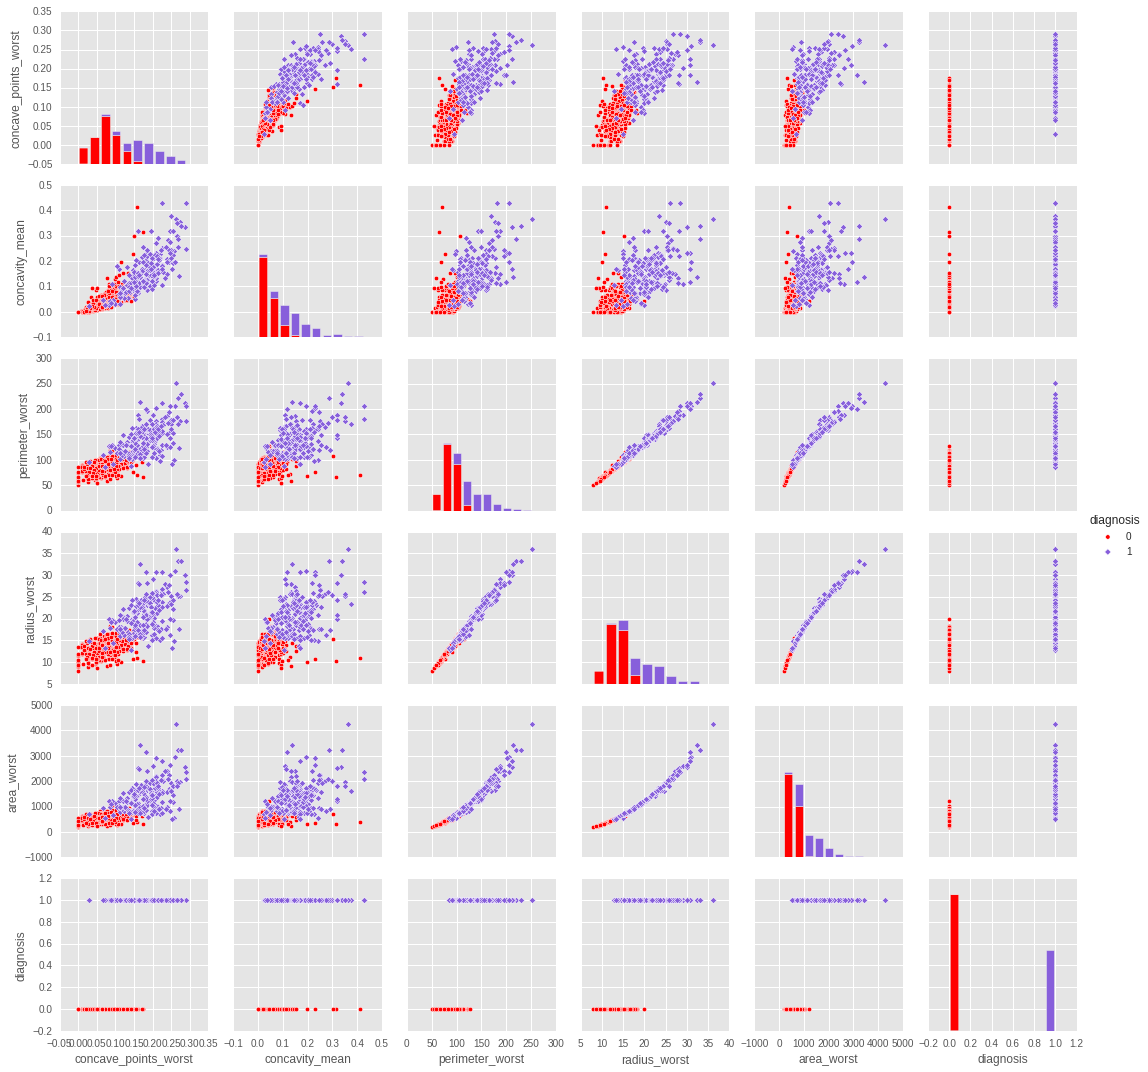

In [67]:
# Scatterplot Matrix
# Variables chosen from Random Forest modeling.
cols = ['concave_points_worst', 'concavity_mean', 
        'perimeter_worst', 'radius_worst', 
        'area_worst', 'diagnosis']

sns.pairplot(breastCancer,
             x_vars = cols,
             y_vars = cols,
             hue = 'diagnosis', 
             palette = ('Red', '#875FDB'), 
             markers=["o", "D"])

You see a matrix of the visual representation of the relationship between 6 variables:
+ `concave_points_worst`
+ `concavity_mean`
+ `perimeter_worst`
+ `radius_worst`
+ `area_worst`
+ `diagnosis`

Within each scatterplot we were able to color the two classes of **Dx**, which we can clearly see that we can easily distinguish the difference between **Malignant** and **Begnin**. As well as some variable interactions have an almost linear relationship. 

Of course these are just 2-dimensional representations, but its still interesting to see how variables interact with each other in our data set.  

## Pearson Correlation Matrix
The next visual that gives similar context to the last visual, this is called the *Pearson Correlation Matrix*. 

Variable correlation within a *Machine Learning* context doesn't play as an important role as say *linear regression*, there can still be some dangers when a data set has too many variables (and correlation between them). 


When two features (or more) are almost perfectly correlated in a *Machine Learning* setting then one doesn't add any information to your process, thus feature extraction would help reduce dimensions (and/or remove variables that don't add to our model) which helps avoid the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). As well as reducing computational time if once we deduce that feature extraction is necessary from visually seeing too much correlation within our variables.     



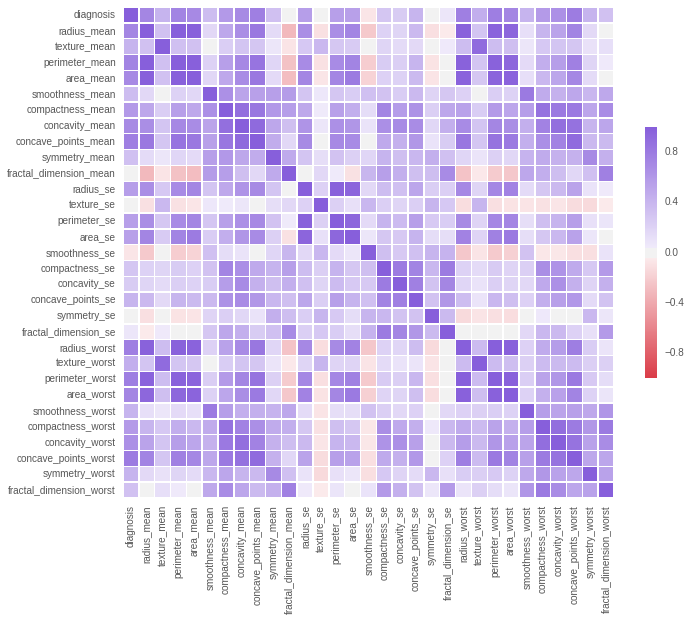

In [10]:
corr = breastCancer.corr(method = 'pearson') # Correlation Matrix

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 275, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap,square=True, 
            xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

We can see that our data set contains mostly positive correlation, as well as re-iterating to us that the 5 dependent variables we featured in the *Scatterplot Matrix* have strong *correlation*. Our variables don't have too much correlation so I won't go about doing feature extraction processes like **PCA**, but you are more welcomed to do so (you will probably get better prediction estimates).    

We can see that our data set contains mostly positive correlation, as well as re-iterating to us that the 5 dependent variables we featured in the *Scatterplot Matrix* have strong *correlation*. Our variables don't have too much correlation so I won't go about doing feature extraction processes like **PCA**, but you are more welcomed to do so (you will probably get better prediction estimates).    

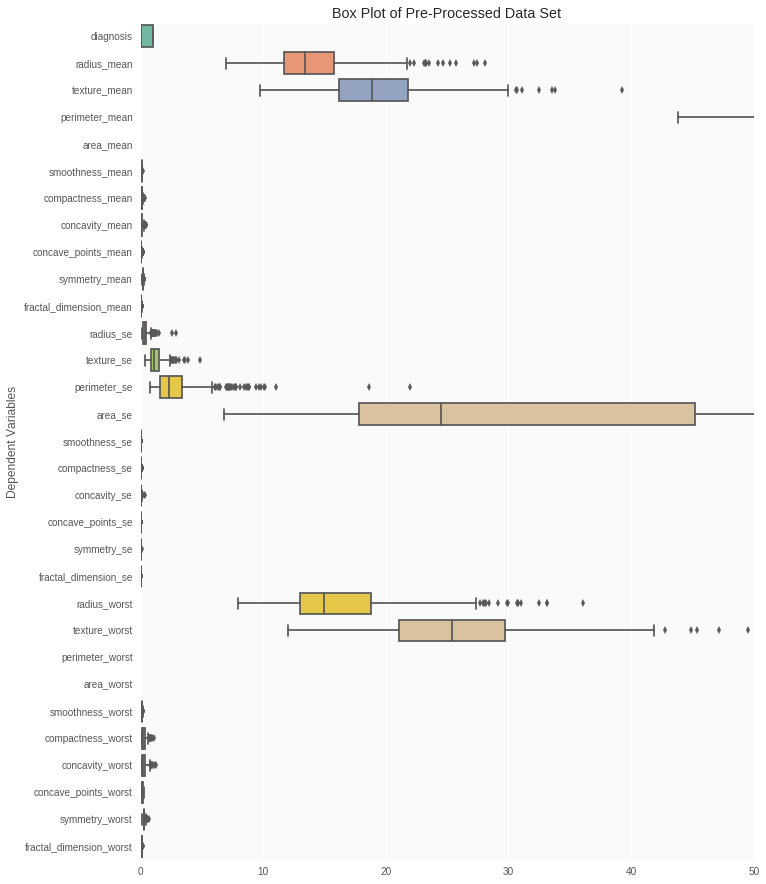

In [11]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
ax.set(xlim=(-.05, 50))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = breastCancer, orient = 'h', palette = 'Set2')

Not the best picture but this is a good segue into the next step in our *Machine learning* process.

Here I used a function I created in my python script. Refer to `helperFunction.py` to understand the process but I'm setting the minimum of 0 and maximum of 1 to help with some machine learning applications later on in this report. 

In [12]:
breastCancerNorm = normalize_df(breastCancer)

Let's try the `.describe()` function again and you'll see that all variables have a maximum of 1 which means we did our process correctly. 

In [13]:
breastCancerNorm.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Box Plot of Transformed Data

Now to further illustrate the transformation let's create a *boxplot* of the scaled data set, and see the difference from our first *boxplot*. 

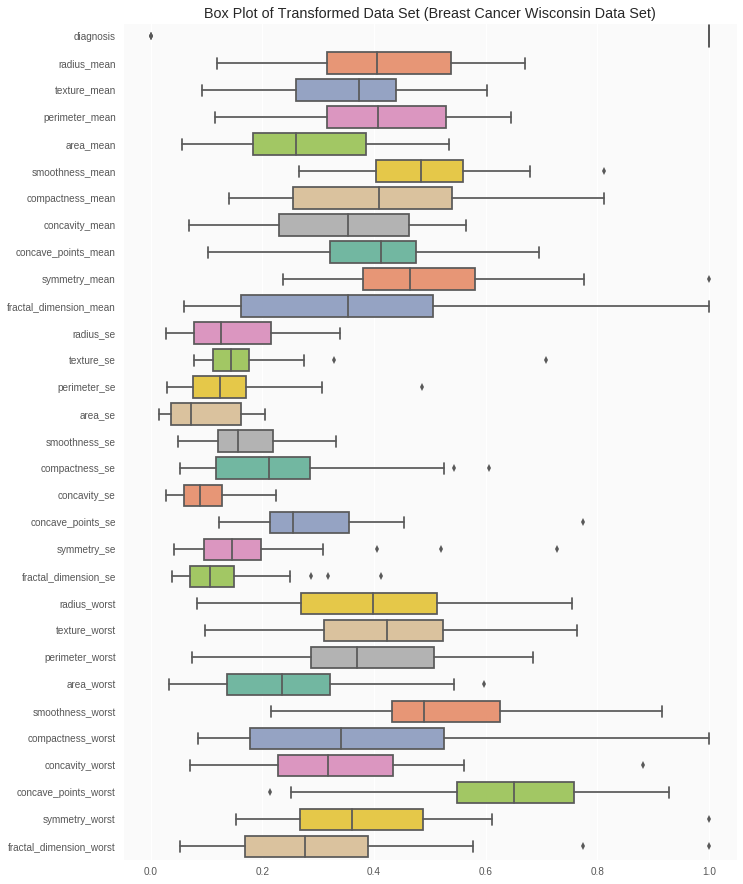

In [14]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
plt.title("Box Plot of Transformed Data Set (Breast Cancer Wisconsin Data Set)")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breastCancerNorm[1:29], orient = 'h', palette = 'Set2')

# Model Estimation
## Creating Training and Test Sets

For this next process, we split the data set into our training and test sets which will be (pseudo) randomly selected having a 80-20% splt. 

In [15]:
# Here we do a 80-20 split for our training and test set
train, test = train_test_split(breastCancer, 
                               test_size = 0.20, 
                               random_state = 42)

# Create the training test omitting the diagnosis
training_set = train.ix[:, train.columns != 'diagnosis']
# Next we create the class set (Called target in Python Documentation)
# Note: This was confusing af to figure out cus the documentation is low-key kind of shitty
class_set = train.ix[:, train.columns == 'diagnosis']

# Next we create the test set doing the same process as the training set
test_set = test.ix[:, test.columns != 'diagnosis']
test_class_set = test.ix[:, test.columns == 'diagnosis']

# Kth Nearest Neighbor

A popular algorithm within classification, *kth nearest neighbor* employs a majority votes methodology using *Euclidean Distance* (a.k.a straight-line distance between two points) based on the specificied *k*. 

So within context of my data set, I employ *k=9* so the algorithm looks for the 9 neighbors closest to the value its trying to classify (again closest measured using [Euclidean Distance](http://mathworld.wolfram.com/Distance.html). This algorithm is known as a *lazy algorithm* and is considered one of the simpler algorithms in *Machine Learning*. 


I like using *kth nearest neighbor* because it gives me a base to compare other methods. One can often find that *K-nn* will perform better than more complicated methods, which by *Occam's Razor* will signal you to choose this method even though other methods are seen as *cooler* and what not. 

**Important to Note**: The biggest drawback for *K-NN* is the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)  

### Set up the Algorithm
I will be employing `scikit-learn` algorithms for this process of my project, but in the future I would be interested in building the algorithms from "scratch". I'm not there yet with my learning though. 

In [16]:
fit_KNN = KNeighborsClassifier(n_neighbors=7)

### Train the Model

Next we train the model on our *training set* and the *class set*. The other models follow a similar pattern, so its worth noting here I had to call up the `'diagnosis'` column in my `class_set` otherwise I got an error code. 

In [17]:
fit_KNN.fit(training_set, class_set['diagnosis'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### Training Set Calculations
For this set, we calculate the accuracy based on the training set. I decided to include this to give context, but within *Machine Learning* processes we aren't concerned with the *training error rate* since it can suffer from high *bias* and over-fitting. 

This is why we create a test set to *test* the algorithm against data it hasn't seen before. This is important if you are just getting into *Machine Learning*. Of course *cross-validation* is more effective (which I will probably employ on a later iteration) in measuring the algorithm's performance, it is important to understand how *training* and *test sets* function.

In [18]:
# We predict the class for our training set
predictionsTrain = fit_KNN.predict(training_set) 

# Here we create a matrix comparing the actual values vs. the predicted values
print(pd.crosstab(predictionsTrain, 
                  class_set['diagnosis'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

# Measure the accuracy based on the trianing set
accuracyTrain = fit_KNN.score(training_set, class_set['diagnosis'])

print("Here is our accuracy for our training set: {0: .3f} ".format(accuracyTrain))

Actual Values       0    1
Predicted Values          
0                 279   20
1                   7  149
Here is our accuracy for our training set:  0.941 


In [19]:
train_error_rate = 1 - accuracyTrain   
print("The train error rate for our model is: {0: .3f}".format(train_error_rate))

The train error rate for our model is:  0.059


## Cross Validation 
We do cross validation as another form of accuracy since there can be bias in our training and test set methodology. Setting different seeds and creating different training and test sets can lead to drastic differences in *Test Error Rate*. 

In [20]:
n = KFold(n_splits=10)

scores = cross_val_score(fit_KNN, 
                         test_set, 
                         test_class_set['diagnosis'], 
                         cv = n)
print("Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))

Accuracy:  0.95 (+/-  0.04)


### Test Set Evaluations

Next we start doing calculations on our *test set*, this will be our form of measurement that will indicate whether our model truly will perform as well as it did for our *training set*. 

We could have simply over-fitted our model, but since the model hasn't seen the *test set* it will be an un-biased measurement of accuracy. 

In [21]:
# First we predict the Dx for the test set and call it predictions
predictions = fit_KNN.predict(test_set)

# Let's compare the predictions vs. the actual values
print(pd.crosstab(predictions, 
                  test_class_set['diagnosis'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

# Let's get the accuracy of our test set
accuracy = fit_KNN.score(test_set, test_class_set['diagnosis'])

# TEST ERROR RATE!!
print("Here is our accuracy for our test set: {0: .3f}".format(accuracy))

Actual Values      0   1
Predicted Values        
0                 70   4
1                  1  39
Here is our accuracy for our test set:  0.956


In [22]:
# Here we calculate the test error rate!
test_error_rate = 1 - accuracy
print("The test error rate for our model is: {0: .3f}".format(test_error_rate))

The test error rate for our model is:  0.044


### Conclusion for K-NN

So as you can see our **K-NN** model did pretty well! It had an even split of *false positives* and *false negatives* (2 for 2). Great this gives us a base to compare the upcoming models as well as to decide whether the other models are *over-kill* for this data set. 

### Calculating for later use in ROC Curves

Here we calculate the *false positive rate* and *true positive rate* for our model. This will be used later when creating **ROC Curves** when comparing our models. I will go into more detail in that section as well!. 

In [23]:
fpr, tpr, _ = roc_curve(predictions, test_class_set)

###  Calculations for Area under the Curve 
This function calculates the area under the curve which you will see the relevancy later in this project, but ideally we want it to be closest to 1 as possible. 

In [24]:
auc_knn = auc(fpr, tpr)

# Decision Trees

*Decision trees* have a hierarchical structure similar to asking a series of questions until we can deduce the classifications. Each leaf represents a class label while the branches represent the process the tree used to deduce the *leaf nodes* (class label). 

The structure is described as such:
+ The very first node is called the *root node*
+ the nodes within the tree are called the *internal nodes*
+ the nodes at the end of t

For this model we use an index known as the [Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), its the default index, but I included in the model to drive the point home. 

**Important to Note**: Some of the documentation with respect to models in *sklearn* are still confusing for me so I was not able to understand how to go about pruning my tree. Thus to prevent over-fitting I made the `max_depth` equal to 3. And left it as such. A more indepth analysis would utilize this information to reduce dimensions using methods like *Principal Component Analysis*.

In [25]:
dt = DecisionTreeClassifier(random_state = 42, 
                            criterion='gini', 
                            max_depth=3)

fit_dt = dt.fit(training_set, class_set)

Decision trees are important classification models, because often follow decision making similar to that of human decision making. Although it is important to state that they will often perform very poor compared to other predictive modeling. 

The next step we export the image representation of our *Decision Tree* path using `export_graphviz` as a *dot* file (Graph Description language) where we add the `feature_names` or else we get the outputs as follows (which isn't very helpful):

    X[N] where N is the index of the feature space
    
Since I don't have graphviz downloaded on my machine, I use this following online interpretter that will take the plain text from the *dot* file (which I opened with **Sublime Text** and copy pasted) and create the visual graph for free! (Source: https://github.com/dreampuf/GraphvizOnline)

In [26]:
namesInd = names[2:] # Cus the name list has 'id_number' and 'diagnosis' so we exclude those

with open('breastCancerWD.dot', 'w') as f:
    f = export_graphviz(fit_dt, out_file = f,
                        feature_names=namesInd,
                        rounded = True)

<img src='dotFiles/dtWD.png'>

### Variable Importance

A useful feature within what are known as *CART* (Classification And Regression Trees) is extracting which features are important when using the *Gini Impurity*. For this next process we will be grabbing the index of these features, then using a `for loop` to state which were the most important. 

In [27]:
importances = fit_dt.feature_importances_
indices = np.argsort(importances)[::-1]

In [28]:
# Print the feature ranking
print("Feature ranking:")

for f in range(30):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, 
                                                                namesInd[indices[i]], 
                                                                importances[indices[f]]))

Feature ranking:
1. The feature 'concave_points_mean' has a Gini Importance of 0.752304
2. The feature 'concave_points_worst' has a Gini Importance of 0.071432
3. The feature 'radius_worst' has a Gini Importance of 0.056905
4. The feature 'perimeter_worst' has a Gini Importance of 0.056028
5. The feature 'texture_mean' has a Gini Importance of 0.030106
6. The feature 'fractal_dimension_se' has a Gini Importance of 0.020188
7. The feature 'area_se' has a Gini Importance of 0.013038
8. The feature 'concavity_mean' has a Gini Importance of 0.000000
9. The feature 'radius_se' has a Gini Importance of 0.000000
10. The feature 'fractal_dimension_mean' has a Gini Importance of 0.000000
11. The feature 'symmetry_mean' has a Gini Importance of 0.000000
12. The feature 'fractal_dimension_worst' has a Gini Importance of 0.000000
13. The feature 'texture_se' has a Gini Importance of 0.000000
14. The feature 'smoothness_mean' has a Gini Importance of 0.000000
15. The feature 'area_mean' has a Gini 

As you can see here after the 7th feature which is `area_se`, the *Gini Importance* becomes 0 for all remaining variables. 

We cannot make statistical conclusions as to its significance because from prior knowledge I know that *Random Forest* will perform significantly better and give us more insight into the data set. But for now we will continue to do the calculations and receive the test error rates for this model. 
### Test Set Evaluations

In [29]:
accuracy_dt = fit_dt.score(test_set, test_class_set['diagnosis'])

print("Here is our mean accuracy on the test set:\n {0: .3f}".format(accuracy_dt))

Here is our mean accuracy on the test set:
  0.947


In [30]:
predictions_dt = fit_dt.predict(test_set)

print("Table comparing actual vs. predicted values for our test set:\n",
     pd.crosstab(predictions_dt, test_class_set['diagnosis'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Table comparing actual vs. predicted values for our test set:
 Actual Values      0   1
Predicted Values        
0                 69   4
1                  2  39


In [31]:
# Here we calculate the test error rate!
test_error_rate_dt = 1 - accuracy_dt

print("The test error rate for our model is:\n {0: .3f}".format(test_error_rate_dt))

The test error rate for our model is:
  0.053


### Calculating for later use in ROC Curves

In [32]:
fpr1, tpr1, _ = roc_curve(predictions_dt, test_class_set)

### Calculations for Area under Curve 

In [33]:
auc_dt = auc(fpr1, tpr1)

### Conclusions for Decision Trees
As we can see there is still a lot to be desired in performing a succinct analysis using *Decision Trees*. Obviously *Cross-Validation* would be helpful in understanding what appropriate depth and other significant parameters should be done to optimize our model. For this iteration this will not be included, but I do plan on expanding on this in later iterations. A lot of my confusion when doing this project is the documentation leaves a lot to be desired, but with every iteration I'm learning more and more about the functions and their capabilies.

# Random Forest
Also known as *Random Decision Forest* is just that an entire forest of random decision trees. This is an extension of *Decision Trees* that will perform significantly better than a single tree because it corrects over-fitting. Here is a brief overview of the evolution of *CART* analysis, but the process of better evaluations goes as follows:
+ Single Decision Tree (Single tree)
+ Bagging Trees (Multiple trees) [Model with all features, M, considered at splits, where M = all features]
+ Random Forest (Multiple trees) [Model with m features considered at splits, where m < M]

### Bagging Trees
*Decision Trees* tend to have *low bias and high variance*, a process known as *Bagging Trees* (*Bagging* = *Bootstrap Aggregating*) was an extension that does random sampling with replacement where after creating N trees it classifies on majority votes. This process reduces the variance while at the same time keeping the bias low. However, a downside to this process is if certain features are strongly predictors then too many trees will employ these features causing correlation between the trees. 

Thus *Random Forest* aims to reduce this correlation by choosing only a subsample of the feature space at each split. Essentially aiming to make the trees more independent thereby reducing the variance.   

Generally, we aim to create 500 trees and use our m to be sqrt(M) rounded down. So since we have 30 features I will use 5 for my `max_features` parameter. Recall I will be using the *Gini Importance* metric, although it is the default I will always include it in this project to give context. 

In [34]:
fit_RF = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)

In [35]:
fit_RF.fit(training_set, class_set['diagnosis'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

## Variable Importance

Essentially the same process as the *Decision Trees*, but we gather this instance from **500** trees! 

In [36]:
importancesRF = fit_RF.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRF

array([27, 23,  7, 22, 20,  6,  0,  2,  3, 26, 13, 21, 10,  1, 25, 28, 24,
        5, 12, 16,  4, 19, 29, 15, 18,  9, 17, 11,  8, 14])

In [37]:
# Print the feature ranking
print("Feature ranking:")

for f in range(30):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, 
                                                                namesInd[indicesRF[i]], 
                                                                importancesRF[indicesRF[f]]))

Feature ranking:
1. The feature 'concave_points_worst' has a Gini Importance of 0.139713
2. The feature 'area_worst' has a Gini Importance of 0.122448
3. The feature 'concave_points_mean' has a Gini Importance of 0.115332
4. The feature 'perimeter_worst' has a Gini Importance of 0.114410
5. The feature 'radius_worst' has a Gini Importance of 0.082506
6. The feature 'concavity_mean' has a Gini Importance of 0.051091
7. The feature 'radius_mean' has a Gini Importance of 0.047065
8. The feature 'perimeter_mean' has a Gini Importance of 0.041769
9. The feature 'area_mean' has a Gini Importance of 0.040207
10. The feature 'concavity_worst' has a Gini Importance of 0.038435
11. The feature 'area_se' has a Gini Importance of 0.029797
12. The feature 'texture_worst' has a Gini Importance of 0.021006
13. The feature 'radius_se' has a Gini Importance of 0.016963
14. The feature 'texture_mean' has a Gini Importance of 0.016359
15. The feature 'compactness_worst' has a Gini Importance of 0.015939


We don't run into the same issue as *Decision Trees* when looking at the *Variable Importance*, and we can be more sure that our *Random Forest* model gives us significant results for our analysis. Let's create a barplot showcasing the *Variable Importance* against the *Gini Importance*.

### Feature Importance Visual

Here I use the `sorted` function to sort the *Gini Importance* criterion from least to greatest which was a work around in order to create a horizontal barplot, as well as creating an index using the `arange` function in `numpy`

In [38]:
indRf = sorted(importancesRF) # Sort by Decreasing order
index = np.arange(30)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [39]:
feature_space = []
for i in range(29, -1, -1):
    feature_space.append(namesInd[indicesRF[i]])

Now let's plot it. 

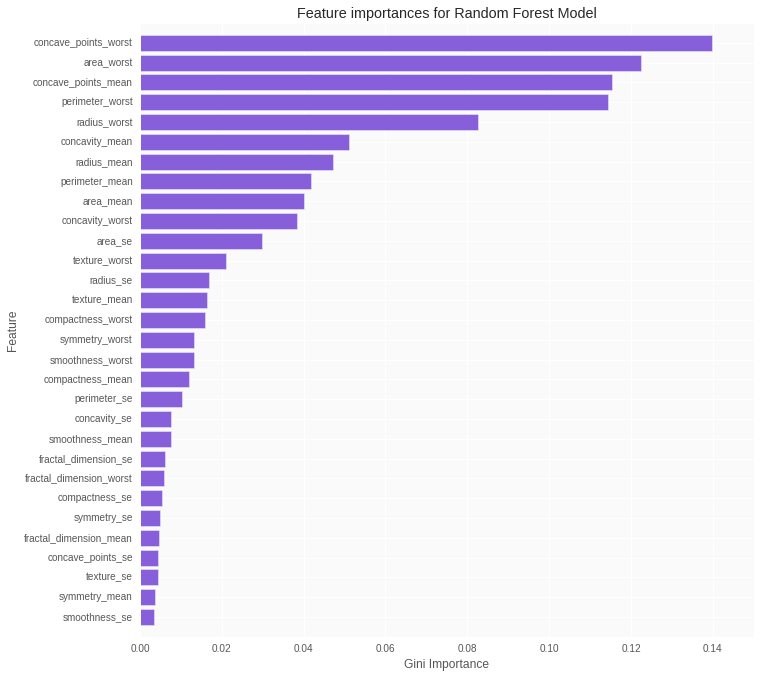

In [40]:
f, ax = plt.subplots(figsize=(11, 11))

ax.set_axis_bgcolor('#fafafa')
plt.title('Feature importances for Random Forest Model')
plt.barh(index, indRf,
        align="center", 
        color = '#875FDB')

plt.yticks(index, feature_space)
plt.ylim(-1, 30)
plt.xlim(0, 0.15)
plt.xlabel('Gini Importance')
plt.ylabel('Feature')

plt.show()

In [41]:
# CROSS VALIDATION
n = KFold(n_splits=10)
scores = cross_val_score(fit_RF, 
                         test_set, 
                         test_class_set['diagnosis'], 
                         cv = n)

print("Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))

Accuracy:  0.96 (+/-  0.03)


## Test Set Evaluations

In [42]:
predictions_RF = fit_RF.predict(test_set)

In [43]:
print(pd.crosstab(predictions_RF, 
                  test_class_set['diagnosis'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Actual Values      0   1
Predicted Values        
0                 70   3
1                  1  40


In [44]:
accuracy_RF = fit_RF.score(test_set, test_class_set['diagnosis'])

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_RF))

Here is our mean accuracy on the test set:
 0.965


In [45]:
# Here we calculate the test error rate!
test_error_rate_RF = 1 - accuracy_RF
print("The test error rate for our model is:\n {0: .3f}"\
      .format(test_error_rate_RF))

The test error rate for our model is:
  0.035


### Calculating for later use in ROC Curves

In [46]:
fpr2, tpr2, _ = roc_curve(predictions_RF, 
                          test_class_set)

### Calculations for  Area under Curve

In [47]:
auc_rf = auc(fpr2, tpr2)

## Conclusions for Random Forest
Edit later 

# Neural Network

First we have to scale our data. 

## Normalzing Data

In [48]:
breastCancerNorm = normalize_df(breastCancer)

In [49]:
training_set_norm, class_set_norm, test_set_norm, test_class_set_norm = splitSets(breastCancerNorm)

In [50]:
fit_NN = MLPClassifier(solver='lbfgs', 
                       hidden_layer_sizes=(5, ), 
                       activation='logistic',
                       random_state=7)

In [51]:
fit_NN.fit(training_set_norm, 
           class_set_norm['diagnosis'])

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [52]:
n = KFold(n_splits=10)
scores = cross_val_score(fit_NN, 
                         test_set_norm, 
                         test_class_set_norm['diagnosis'], 
                         cv = n)

print("Accuracy: {0: 0.2f} (+/- {1: 0.2f})"\
      .format(scores.mean(), scores.std() / 2))

Accuracy:  0.93 (+/-  0.03)


Left here to show that *Neural Networks* perform poorly when appropriate pre-processing transformations *aren't* made. 

In [53]:
predictions_NN = fit_NN.predict(test_set_norm)

print(pd.crosstab(predictions_NN, test_class_set_norm['diagnosis'], 
                  rownames=['Predicted Values'], 
                  colnames=['Actual Values']))

Actual Values      0   1
Predicted Values        
0                 69   1
1                  2  42


In [54]:
accuracy_NN = fit_NN.score(test_set_norm, test_class_set_norm['diagnosis'])

print("Here is our mean accuracy on the test set:\n{0: .2f} ".format(accuracy_NN))

Here is our mean accuracy on the test set:
 0.97 


In [55]:
# Here we calculate the test error rate!
test_error_rate_NN = 1 - accuracy_NN
print("The test error rate for our model is:\n {0: .3f}"\
      .format(test_error_rate_NN))

The test error rate for our model is:
  0.026


In [56]:
fpr3, tpr3, _ = roc_curve(predictions_NN, test_class_set)

In [57]:
auc_nn = auc(fpr3, tpr3)

# ROC Curves

*Receiver Operating Characteristc* Curve calculations we did using the function `roc_curve` were calculating the **False Positive Rates** and **True Positive Rates** for each model. We will now graph these calculations, and being located the top left corner of the plot indicates a really ideal model, i.e. a **False Positive Rate** of 0 and **True Positive Rate** of 1, so we plot the *ROC Curves* for all our models in the same axis and see how they compare!

We also calculated the **Area under the Curve**, so our curve in this case are the *ROC Curves*, we then place these calculations in the legend with their respective models. 

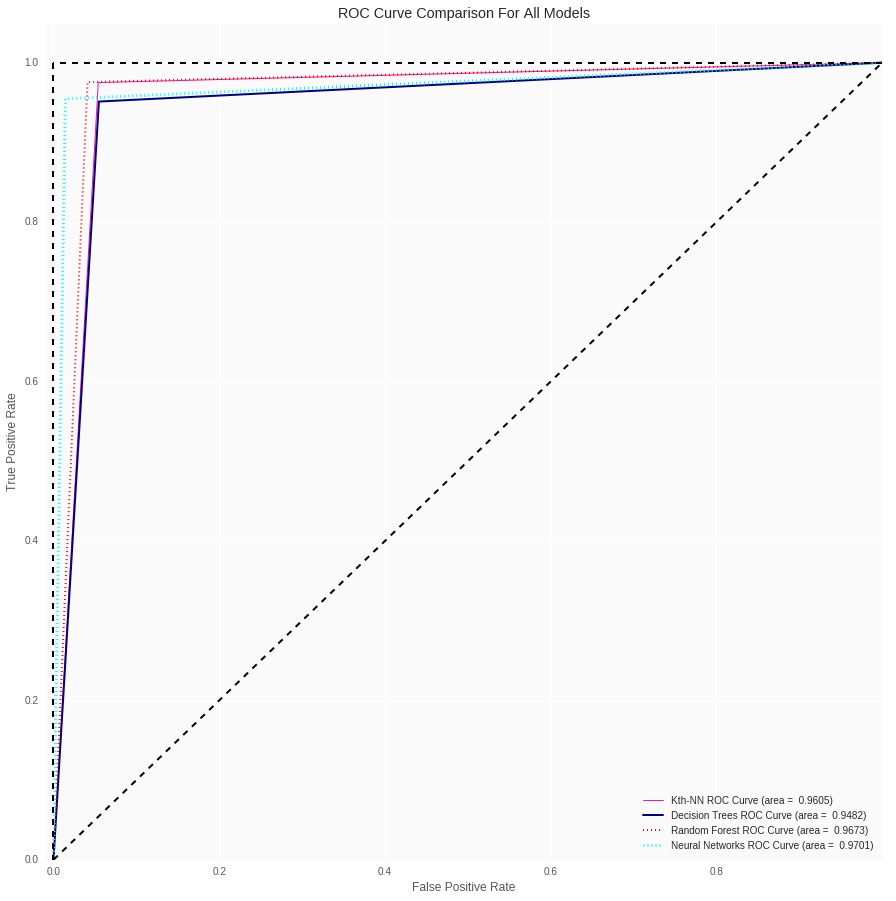

In [61]:
f, ax = plt.subplots(figsize=(15, 15))

plt.plot(fpr, tpr, label='Kth-NN ROC Curve (area = {0: .4f})'.format(auc_knn), 
         color = 'deeppink', 
         linewidth=1)
plt.plot(fpr1, tpr1,label='Decision Trees ROC Curve (area = {0: .4f})'.format(auc_dt), 
         color = 'navy', 
         linewidth=2)
plt.plot(fpr2, tpr2,label='Random Forest ROC Curve (area = {0: .4f})'.format(auc_rf), 
         color = 'red', 
         linestyle=':', 
         linewidth=2)
plt.plot(fpr3, tpr3,label='Neural Networks ROC Curve (area = {0: .4f})'.format(auc_nn), 
         color = 'aqua', 
         linestyle=':', 
         linewidth=3)

ax.set_axis_bgcolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models')
plt.legend(loc="lower right")

plt.show()

Let's zoom in to get a better picture!

### ROC Curve Plot Zoomed in

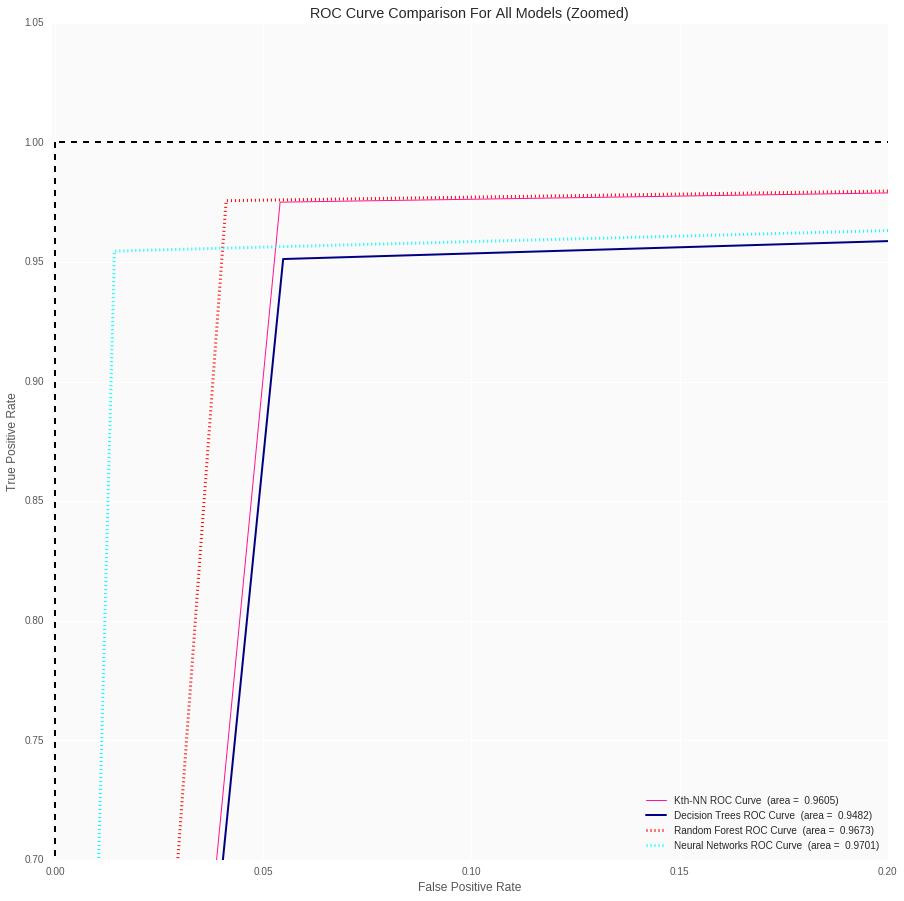

In [60]:
f, ax = plt.subplots(figsize=(15, 15))
plt.plot(fpr, tpr, label='Kth-NN ROC Curve  (area = {0: .4f})'.format(auc_knn), 
         color = 'deeppink', 
         linewidth=1)
plt.plot(fpr1, tpr1,label='Decision Trees ROC Curve  (area = {0: .4f})'.format(auc_dt), 
         color = 'navy', 
         linewidth=2)
plt.plot(fpr2, tpr2,label='Random Forest ROC Curve  (area = {0: .4f})'.format(auc_rf), 
         color = 'red', 
         linestyle=':', 
         linewidth=3)
plt.plot(fpr3, tpr3,label='Neural Networks ROC Curve  (area = {0: .4f})'.format(auc_nn), 
         color = 'aqua', 
         linestyle=':', 
         linewidth=3)


ax.set_axis_bgcolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line

plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.001, 0.2])
plt.ylim([0.7, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models (Zoomed)')
plt.legend(loc="lower right")

plt.show()

From the `auc` calculations we can see that both *Random Forest* and *Neural Networks* performed better than *Kth Nearest Neighbor* and *Decision Trees* which is pretty intuitive. 

Also visually examining the plot, *Random Forest* is noticeable more elevated than the other models which is indicative of a good prediction tool, using this form of diagnositcs. I will go into more detail later on, but for now this will do. 

## Conclusions
Once I employed all these methods, we can that **Neural Networks** performed the best in terms of most diagnostics. *Kth Nearest Neighbor* performed better in terms of *cross validation*, but I have yet to perform *hyperparameter optimization* on other processes.  This project is an iterative process, so I will be working to reach a final consensus. In terms of most insight into the data, *random forest* model is able to tell us the most of our model. In terms of cross validated performance *kth nearest neighbor* performed the best.  

### Diagnostics for Data Set

| Model/Algorithm 	| Test Error Rate 	| False Negative for Test Set 	| Area under the Curve for ROC | Cross Validation Score | 
|-----------------|-----------------|-------------------------------|----------------------------|-----------|
| Kth Nearest Neighbor* | 0.035 |	2 |	0.963 | 0.966 (+/-  0.021) | 
| Decision Trees 	| 0.053 	| 4 |	0.948 | 0.920 (+/-  0.024) | 
| Random Forest 	|  0.035	| 3 	| 0.9673 |  0.955 (+/-  0.030) |  
| Neural Networks 	| 0.026 	| 1 	| 0.981 | 0.930 (+/-  0.034) |  

\*Only model with *Hyperparameter optimization* done